# Основы машинного обучения

## Описание проекта

**Задача**

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:

научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;

сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;

проанализировать основные признаки, наиболее сильно влияющие на отток;

сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

1) выделить целевые группы клиентов;

2) предложить меры по снижению оттока;

3) определить другие особенности взаимодействия с клиентами.

**Описание данных**

*Данные клиента за предыдущий до проверки факта оттока месяц:*

* 'gender' — пол;

* 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;

* 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);

* Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);

* 'Phone' — наличие контактного телефона;

* 'Age' — возраст;

* 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

*Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:*

* 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);

* 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);

* 'Group_visits' — факт посещения групповых занятий;

* 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;

* 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;

* 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.

* 'Churn' — факт оттока в текущем месяце.


In [1]:
# импорт библиотек

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

In [2]:
#чтение файла
try:
    data = pd.read_csv('gym_churn.csv')
except:
    data = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## Исследовательский анализ данных (EDA)

### Посмотрите на датасет: есть ли в нём отсутствующие значения (пропуски), изучите средние значения и стандартные отклонения (пригодится метод describe());

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
data.duplicated().sum()

0

В таблице нет пропусков и дубликатов, тип данных соответствует значениям в столбцах. В столбце "Month_to_end_contract" тип можно заменить на целочисленный.

In [6]:
data.columns = data.columns.str.lower() # для удобства избавились от заглавных букв в названиях столбцов

In [7]:
data['month_to_end_contract'] = data['month_to_end_contract'].astype('int64') #изменение типа данных

In [8]:
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


* По полу посетители распределяются примерно одинаково
* Большинство клиентов живет/работает в районе фитнес-центра(84,5%)
* Менее половины являются сотрудниками компании-компании партнера клуба и около 3 пришли по акции "приведи друга"
* Около 40% клиентов посещают групповые занятия
* Средний возраст клиента - 29 лет, в целом клуб посещают люди от 18 до 41
* Выручка за другие услуги центра в среднем состаялет 146 у.е.
* В среднем клиенты ходят в зал около 2 раз в неделю 
* Отток - 27%

### Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());

In [9]:
data.groupby('churn').mean().T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


В основном, остаются клиентами фитнес-центра люди, живущие/работающие рядом с ним, пришедшие по акции или по партнерской программе с работы. У них абонемент на долгий срок, 6 месяцев и более, они пользуюся доп.услугами центрами и ходят в зал около 2 раз в неделю.

В отток ушли люди, пришедшие в зал самостоятельно (без акции и программ). Среди них меньше тех, кто живет/работает в районе фитнес-центра.В основном они покупают абонемент на месяц, в среднем ходят один раз в неделю.
Распрделение по полу примерно одинаково, а средний возраст отличается незначительно. 

### Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);

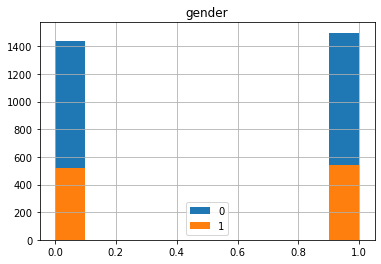

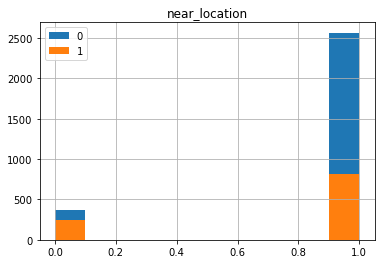

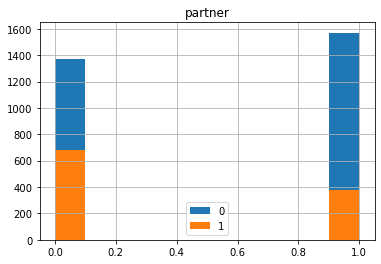

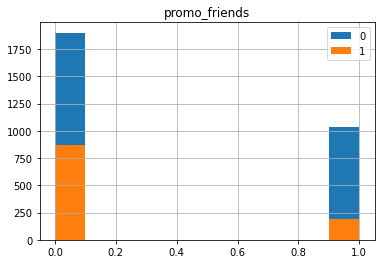

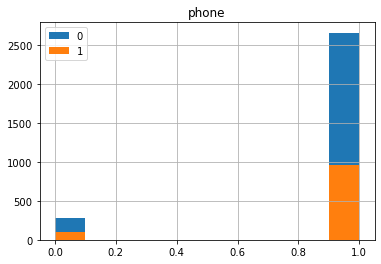

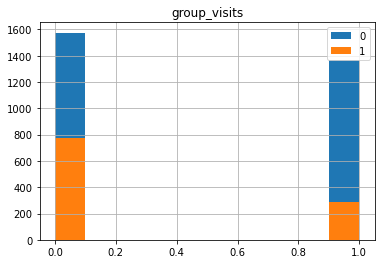

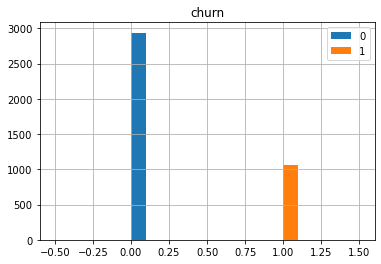

In [10]:
#для построения графиков отдельно выделим столбцы с бинарными значениями, т.к. для них не нужна линия распределения

binar = data[['gender', 'near_location', 'partner','promo_friends', 'phone', 'group_visits', 'churn']]

for col in binar:
    data.groupby('churn')[col].hist(legend=True)
    plt.title(col)  
    plt.show()

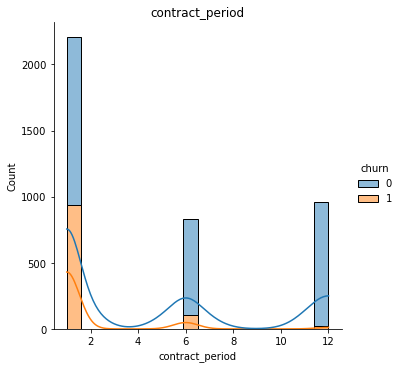

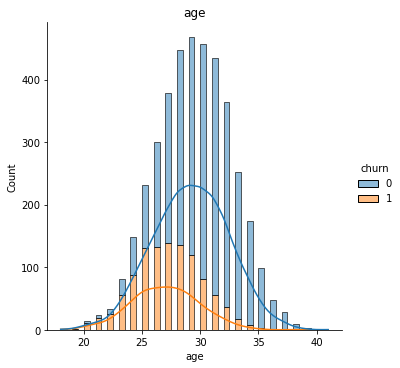

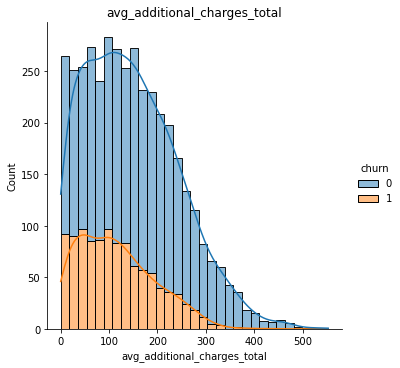

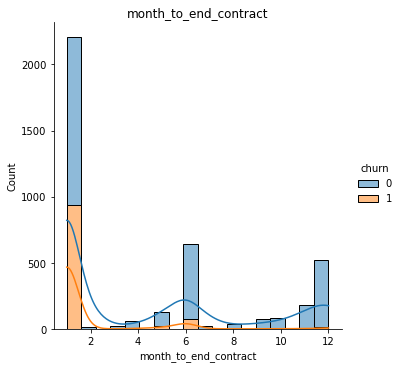

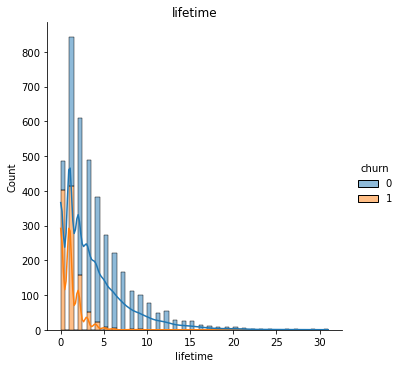

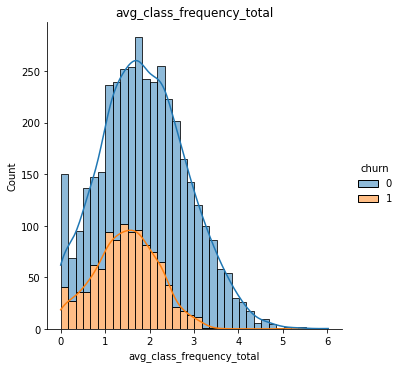

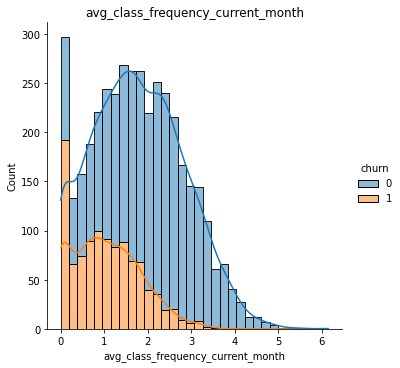

In [11]:
for col in data.columns:
    if col not in binar:
        sns.displot(data = data,x=data[col], hue='churn', kde=True, multiple="stack")
        plt.title(col)

Выводы, сделанные по таблице выше, подтвердились. Особенно на графиках видно разницу в сроках абонементов: среди тех, у кого абонемент на 12 месяцев практически нет тех, кто перестал бы посещать финтес-центр;  также видно разницу в распределнии возраста: в отток попадает больше молодых людей

### Постройте матрицу корреляций и отобразите её.

<AxesSubplot:>

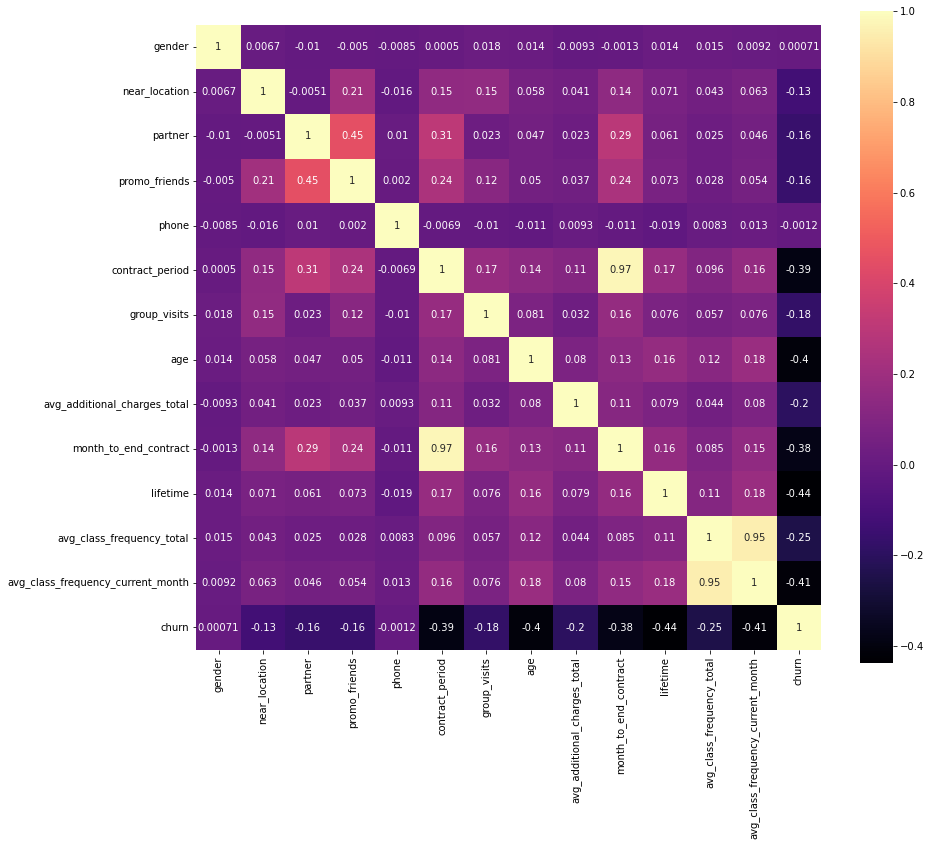

In [12]:
cor = data.corr()
plt.figure(figsize=(14,12))
sns.heatmap(cor, annot=True, square=True, cmap='magma')

- Есть 2 пары признаков, сильно коррелирующих между собой: contract_period и month_to_end_contract; avg_class_frequency_total и avg_class_frequency_current_month; 
- Признаков, явно влияющих на отток, нет 

## Постройте модель прогнозирования оттока клиентов

In [13]:
#  разделим данные на признаки (матрица X) и целевую переменную (y)
X = data.drop('churn', axis=1)
y = data['churn']

In [14]:
#так как у нас нет зависимости от времени, то разделим выборку случайно 80/20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)


### Логистическая регрессия 

In [15]:
l_model = LogisticRegression(solver='liblinear')
l_model.fit(X_train, y_train)

l_predictions = l_model.predict(X_test)
l_probabilities = l_model.predict_proba(X_test)[:,1]

print('Метрики для модели логистической регрессии:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, l_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, l_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, l_predictions)))

Метрики для модели логистической регрессии:
Accuracy: 0.93
Precision: 0.89
Recall: 0.83


### Случайный лес

In [16]:
f_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
f_model.fit(X_train, y_train)

f_predictions = f_model.predict(X_test)
f_probabilities = f_model.predict_proba(X_test)[:,1]

print('Метрики для модели случайного леса:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, f_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, f_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, f_predictions)))

Метрики для модели случайного леса:
Accuracy: 0.92
Precision: 0.88
Recall: 0.83


Модель логистической регрессии дает метрики лучше, чем модель случайного леса

## Сделайте кластеризацию клиентов

### Стандартизация данных и построение дендрограммы 

In [17]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)
linked = linkage(X_sc, method = 'ward') 

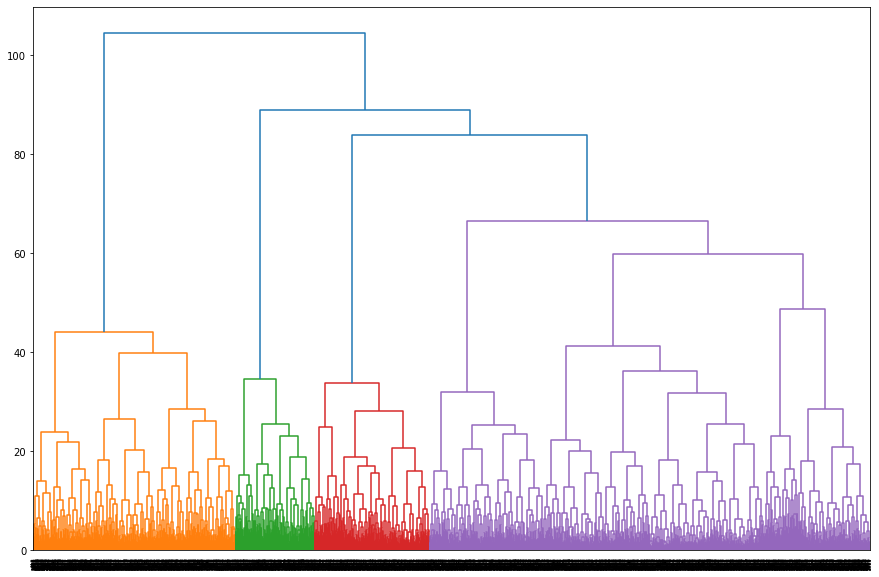

In [18]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
#plt.title('')
plt.show() 

Выделено 4 кластера, но по заданию будем использовать 5

### Алгоритм K-Means 

In [19]:
km =  KMeans(n_clusters=5, random_state=0)

labels =  km.fit_predict(X_sc)

data['cluster_km'] = labels

data.groupby('cluster_km').mean()


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


In [20]:
# кол-во клиентов в кластерах 

data.groupby('cluster_km')['churn'].count().sort_values(ascending=False) 

cluster_km
3    1262
0    1010
4     838
2     505
1     385
Name: churn, dtype: int64

По средним значениям кластеров можно сказать следующее:

**Кластер 0:**

- в основном живет/работает в районе фитнес-центра;
- большая часть пришла по партнерской программе (78%) и по акции(57%) - наибольшие показатели;
- абонемент на длительный срок - 12 месяцев;
- чаще всех посещают групповые занятия;
- посещают зал 2 раза в неделю;
- отток - около 3% - самый низкий показатель из всех кластеров

**Кластер 1:**
- также живут/работают в районе фитнес-центра
- % людей, пришедших по программе и акции значительно ниже, чем в кластере 0
- не указан номер мобильного телефона
- контракт заключен на недлительный срок, вероятно, 6 месяцев
- кол-во посещений центра в неделю также около 2 раз;
- отток - 26%

**Кластер 2:**

- живут/работают не в районе фитнес-центра;
- всего 7% пришли по акции "приведи друга" - самый низкий показатель
- контракт заключен на короткий период;
- только 20% посещает групповые занятия
- посещают фитнес-центр 1-2 раза в неделю;
- отток 44% - один из самых больших показателей;

**Кластер 3:**

- живут/работают в районе фитнес-центра;
- самый низкий процент пришедших по партнерсой программе (35%);
- абонемент также на короткий период;
- посещают зал около 1 раза в неделю;
- самый большой процент оттока - 51%
- в этом кластере больше всего клиентов - 1262

**Кластер 4:**

- живут/работают в районе фитнес-центра;
- групповые занятия посещают реже кластера 0, но чаще кластера 1;
- средний возраст наибольший из всех - 30 лет;
- посещают зал около 3 раз в неделю - наибольший показатель;
- отток - 6%



### Распределение признаков для кластеров

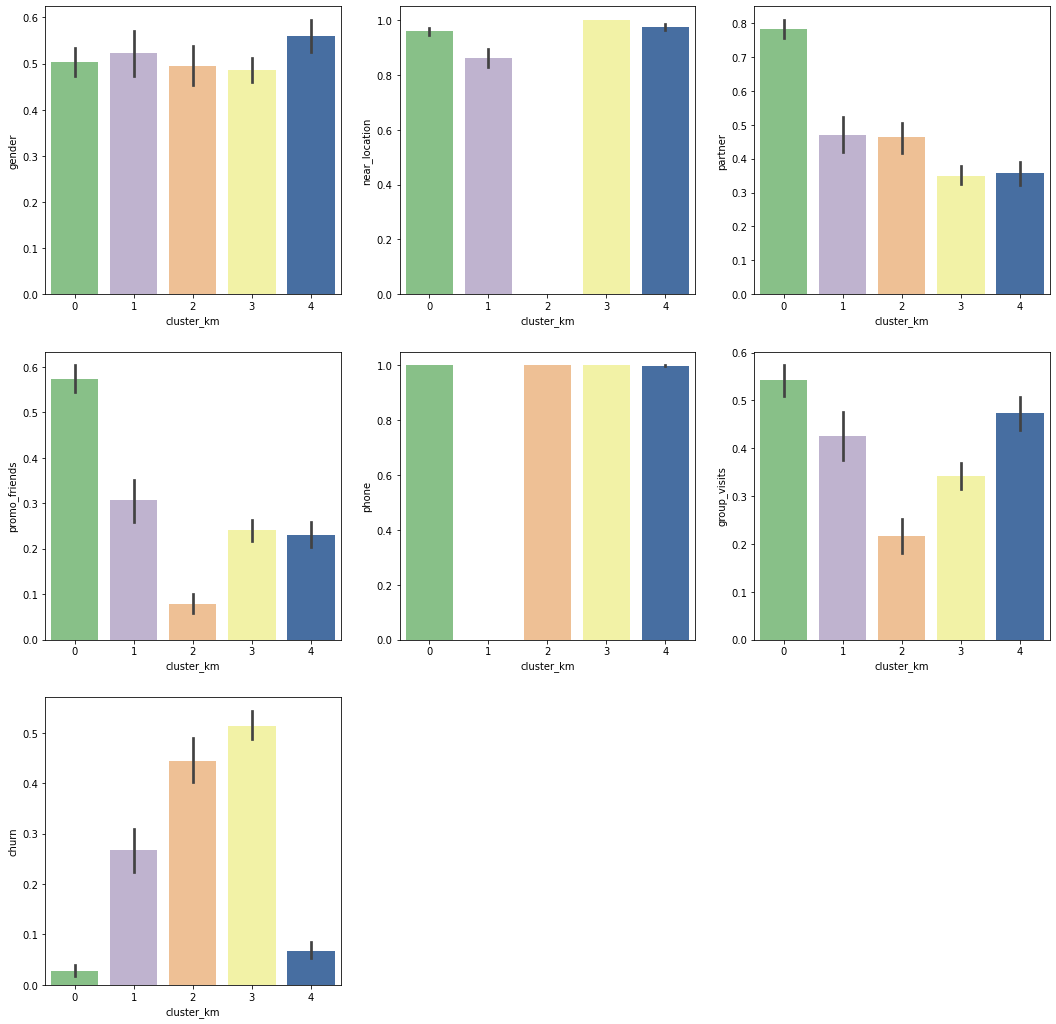

In [21]:
plt.figure(figsize=(18, 18))
for i in range(len(binar.columns)):
    plt.subplot(3, 3, i+1)
    x = data['cluster_km']
    y = binar.iloc[:,i]
    sns.barplot(x=x, y=y, palette='Accent')

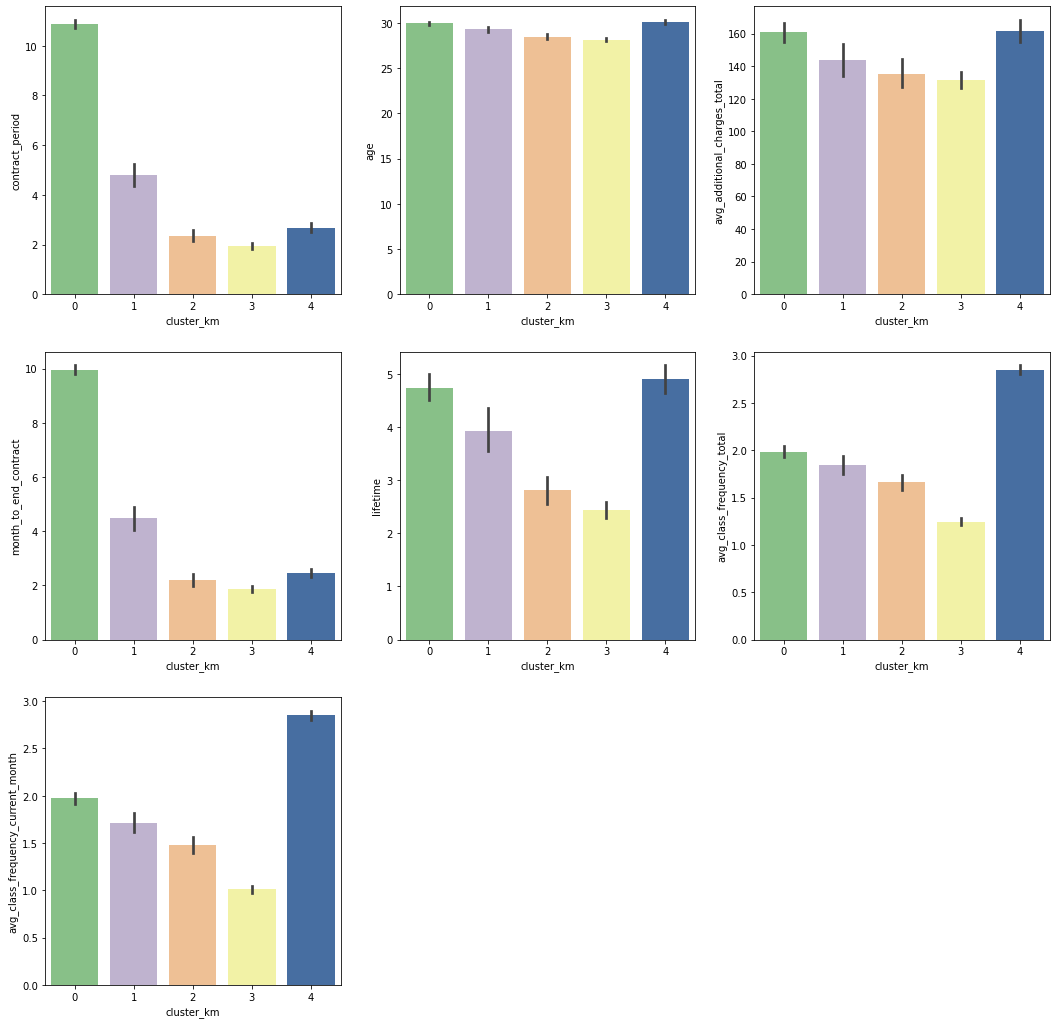

In [22]:
n_binar = data[['contract_period','age','avg_additional_charges_total','month_to_end_contract', 
                'lifetime','avg_class_frequency_total','avg_class_frequency_current_month']]

plt.figure(figsize=(18, 18))
for i in range(len(n_binar.columns)):
    plt.subplot(3, 3, i+1)
    x = data['cluster_km']
    y = n_binar.iloc[:,i]
    sns.barplot(x=x, y=y, palette='Accent')

Графики подтверждают сделанные ранее выводы

## Выводы:

В ходе проведенной работы мы обучили модель для прогнозирования оттока клиентов. Признаков, явно влиющих на отток, выявлено не было.

Общий отток клиентов - 27%

Выделили 5 кластеров клиентов.

Кластеры с наименьшим % оттока характеризуются:

- близостью места работы и/или дома к фитнес-центру
- высоким процентом посещаемости групповых занятий
- наибольший средний возраст - 30 лет
- наибольшими тратами на дополнительные услуги фитнес-центра
- частой посещаемостью зала

При этом различаются сроки абонементов, доли пришедших по программе и по акции 

Кластеры с наибольшим % оттока характеризуются:
 - наименьший средний возраст
 - наименьшие траты на доп.услуги
 - низкой частотой посещений зала
 
При этом различается удаленность от фитнес-центра (в кластере 3 клиенты живут/работают в одном районе с ф-ц, в кластере 2 - в другом), также разные доли клиентов, пришедших по программе и акции
 
 
Рекомендации:
- Так как средний возраст клиентов, ушедших в отток ниже, чем у оставшихся, можно сделать акцент на молодежи и ввести дополнительные акции для студентов или проводить соответствующие мероприятия;
- в кластерах с большим %  оттоком мы видим наибольшую разницу в средней частоте посещения фитнес-центра и частоте посещений за последний месяц - -15%, поэтому можно ввести дополнительне стимулы для посещения зала: скидки на доп.услуги, отслеживание результатов и поощрение за них и т.п.
- также стоит продавать абонементы на более длительный срок, т.к. это тоже может мотивировать клиентов посещать фитнес-центр. Но вполне логично вначале брать абонемент на небольшой срок, чтобы опробовать все, что предлагает фитнес-центр, поэтому для таких клиентов также можно вводить специальные предложения на покупку годового абонемета.

Но в целом, данных для рекомендаций недостаточно, т.к. отток клиентов может быть связан с обслуживанием, с качеством оборудования, с количеством направлений групповых программ и это нужно рассматривать индивидуально. 

 